# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('../data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())




720


In [4]:
#  2. Modify our df to have all duplicate rows removed. 

df.drop_duplicates(inplace=True)

In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
print(f'Column with the most Null Values: {df.isnull().sum().idxmax()}')
print(f'Number of Null Values: {df.isnull().sum().max()}')


Column with the most Null Values: Engine HP
Number of Null Values: 69


In [7]:
# * Print how long our dataframe is.
print(f'Length of Dataframe: {len(df)}')


Length of Dataframe: 11194


In [8]:
# * Remove any row that has a null value in it. 
df.dropna(inplace=True)

In [9]:
# * Do a sanity check and print how long our dataframe is now that we have removed our null values.
print(f'New Length of the Dataframe: {len(df)}')

New Length of the Dataframe: 11092


In [10]:
# Additional Cleaning

# Make all columns lowercase, strip whitespaces and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [11]:
# Look at the datatypes
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

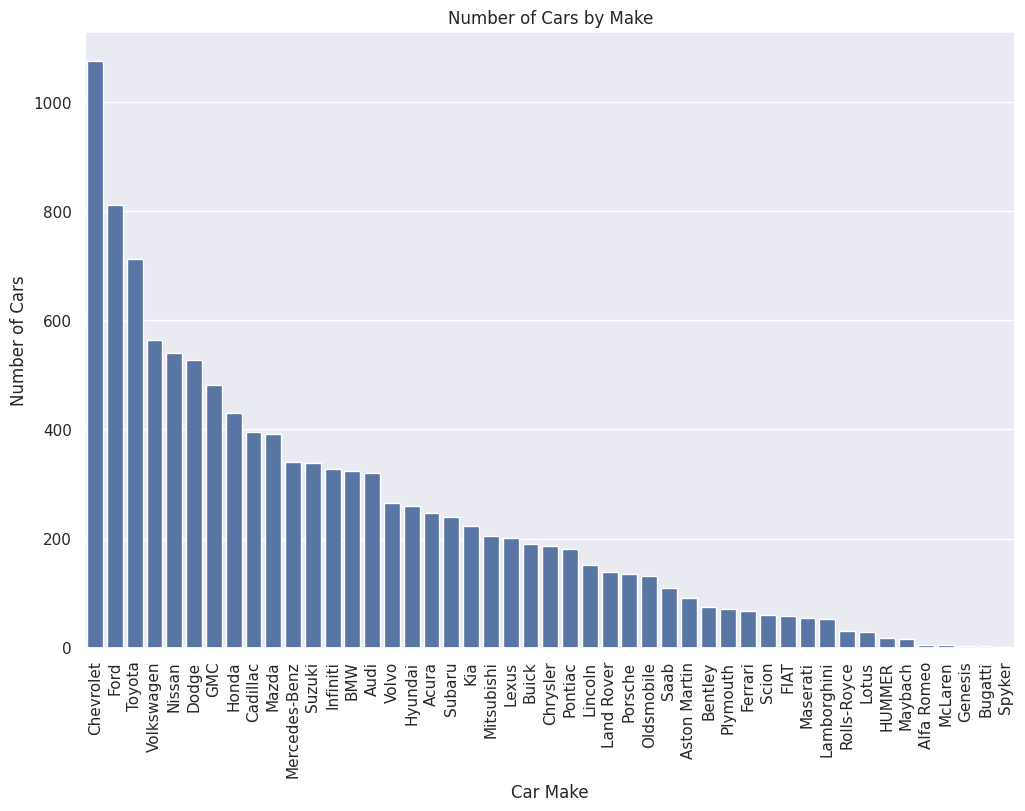

In [12]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='make', order=df['make'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Cars by Make')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.show()

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

In [13]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
# 
# see above


# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


In [14]:
msrp_by_the_year = df.groupby('year')['msrp'].mean().reset_index()
msrp_by_the_year

,year,msrp
0,1990,2032.272727
1,1991,2120.196078
2,1992,2108.346457
3,1993,2211.496855
4,1994,2349.328125
5,1995,2647.206897
6,1996,2566.565217
7,1997,3164.644578
8,1998,3036.151724
9,1999,3153.850877


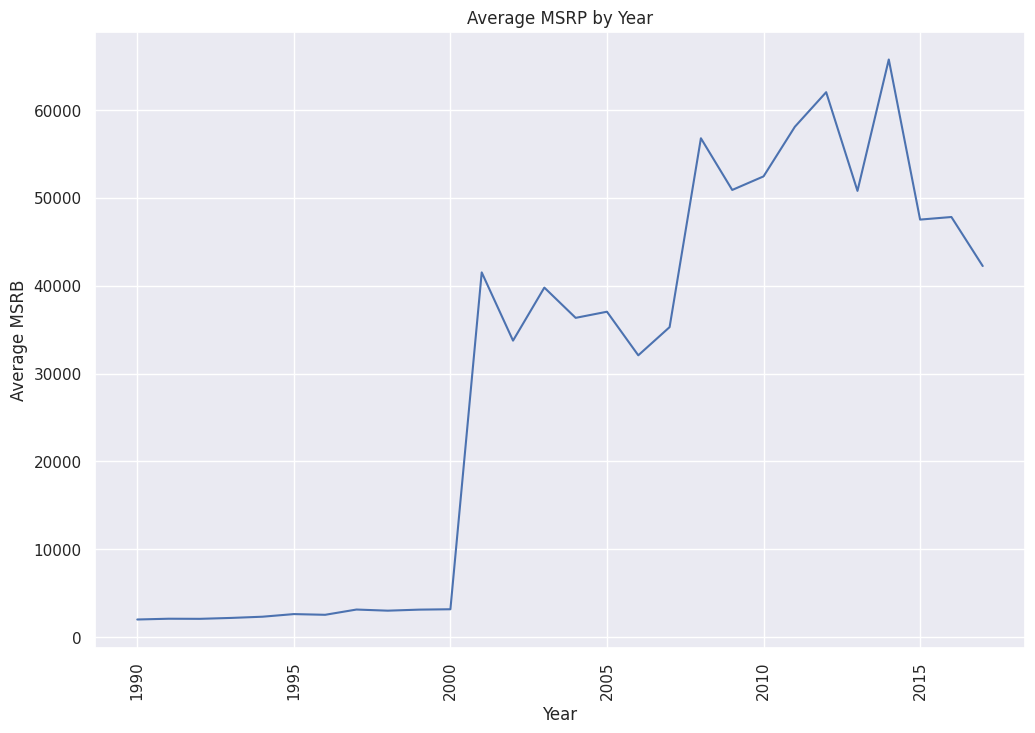

In [15]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
plt.figure(figsize=(12, 8))
sns.lineplot(data=msrp_by_the_year, x='year', y='msrp')
plt.xticks(rotation=90)
plt.title('Average MSRP by Year')
plt.xlabel('Year')
plt.ylabel('Average MSRB')
plt.show()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [16]:
# Make a column where is 10 when year is less than 2000, else 1.
df['price_adjuster'] = np.where(df['year'] < 2000, 10, 1)
df.head()

# Multiply the MSRP by the price adjuster.
df['adjusted_msrp'] = df['msrp'] * df['price_adjuster']
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,price_adjuster,adjusted_msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,1,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,1,34500


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

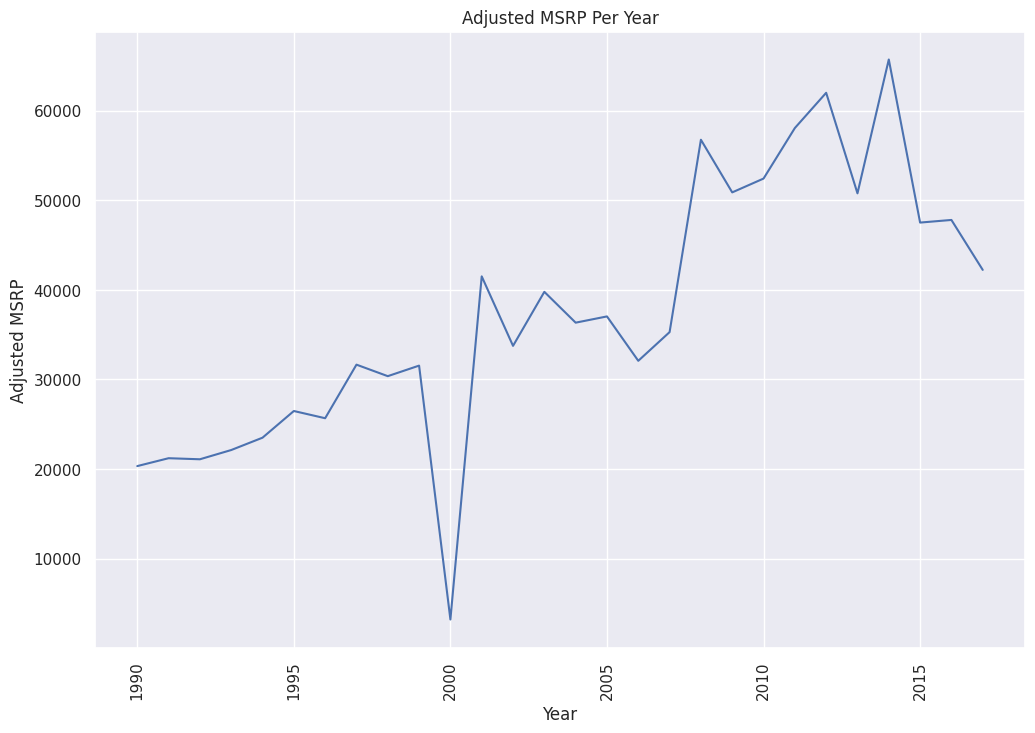

In [17]:
# Plot new prices
adjusted_msrp_by_year = df.groupby('year')['adjusted_msrp'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=adjusted_msrp_by_year, x='year', y='adjusted_msrp')
plt.xticks(rotation=90)
plt.ylabel('Adjusted MSRP')
plt.xlabel('Year')
plt.title('Adjusted MSRP Per Year')
plt.show()

# Plot the relationship between Engine HP and highway MPG

In [18]:
# Plot the relationship between Engine HP and highway MPG
highway_mpg_per_engine_hp = df.groupby('highway_mpg')['engine_hp'].mean().reset_index()
highway_mpg_per_engine_hp



,highway_mpg,engine_hp
0,12,470.000000
1,13,342.214286
2,14,427.891892
3,15,333.222222
4,16,339.575000
5,17,317.893506
6,18,309.747253
7,19,329.563380
8,20,300.554393
9,21,314.183299


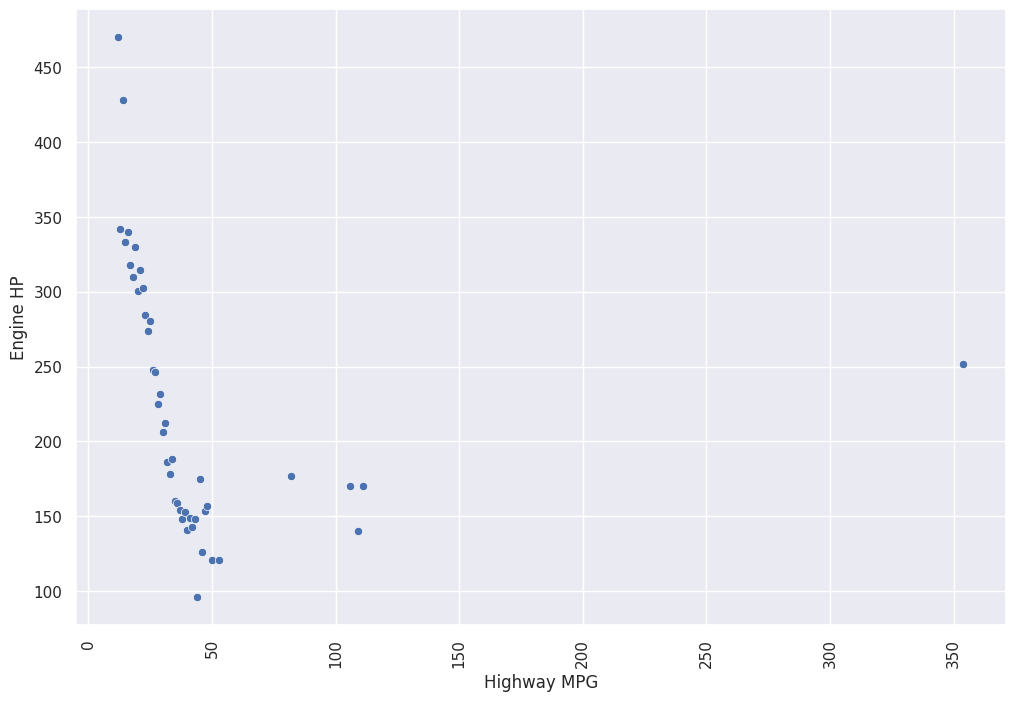

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=highway_mpg_per_engine_hp, x='highway_mpg', y='engine_hp')
plt.xticks(rotation=90)
plt.xlabel('Highway MPG')
plt.ylabel('Engine HP')
plt.show()


In [20]:
highway_mpg_per_engine_hp['highway_mpg'].agg(['min', 'max', 'mean'])

min      12.000000
max     354.000000
mean     44.886364
Name: highway_mpg, dtype: float64

In [21]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 

# Using the 1.5*IQR rule, remove any rows that have an engine_hp that is an outlier.
q1 = df['engine_hp'].quantile(0.25)
q3 = df['engine_hp'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 - 1.5 * iqr

df_cleaned = df[(df['engine_hp'] >= lower_bound) & (df['engine_hp'] <= upper_bound)]

print(f'Shape of Original Dataframe: {df.shape}')
print(f'Shape of Cleaned Dataframe: {df_cleaned.shape}')



Shape of Original Dataframe: (11092, 17)
Shape of Cleaned Dataframe: (321, 17)


# Replot the relationship between Engine HP and highway MPG


In [22]:
# Re-Plot the relationship between Engine HP and highway MPG
cleaned_highway_mpg_per_engine_hp = df_cleaned.groupby('highway_mpg')['engine_hp'].mean().reset_index()
cleaned_highway_mpg_per_engine_hp['highway_mpg'].agg(['min', 'max', 'mean'])

min     15.000000
max     46.000000
mean    31.407407
Name: highway_mpg, dtype: float64

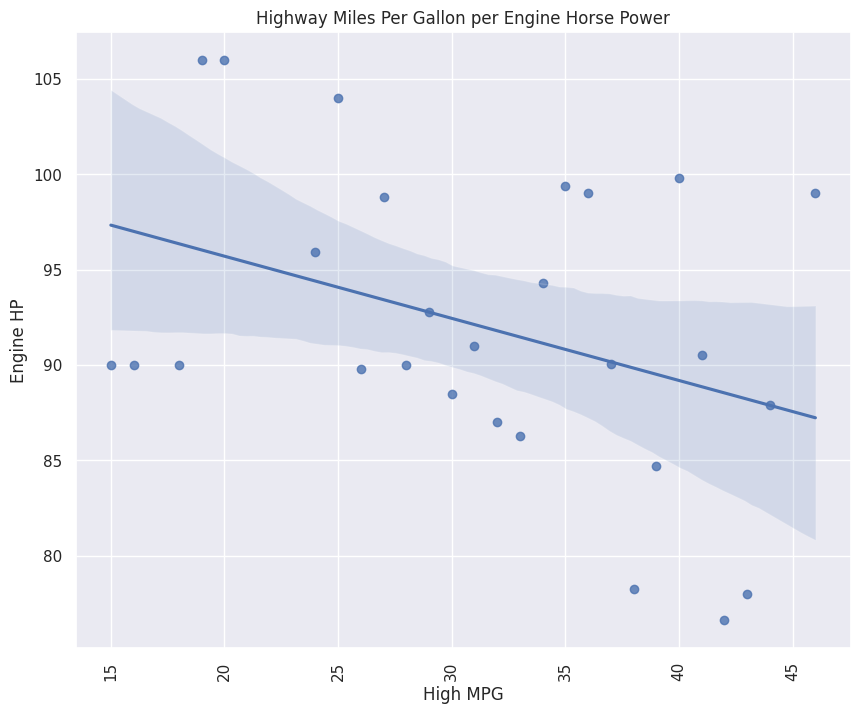

In [23]:
plt.figure(figsize=(10, 8))
sns.regplot(data=cleaned_highway_mpg_per_engine_hp, x='highway_mpg', y='engine_hp')
plt.xticks(rotation=90)
plt.xlabel('High MPG')
plt.ylabel('Engine HP')
plt.title('Highway Miles Per Gallon per Engine Horse Power')
plt.show()

# Make a scatter plot of Engine HP vs highway MPG

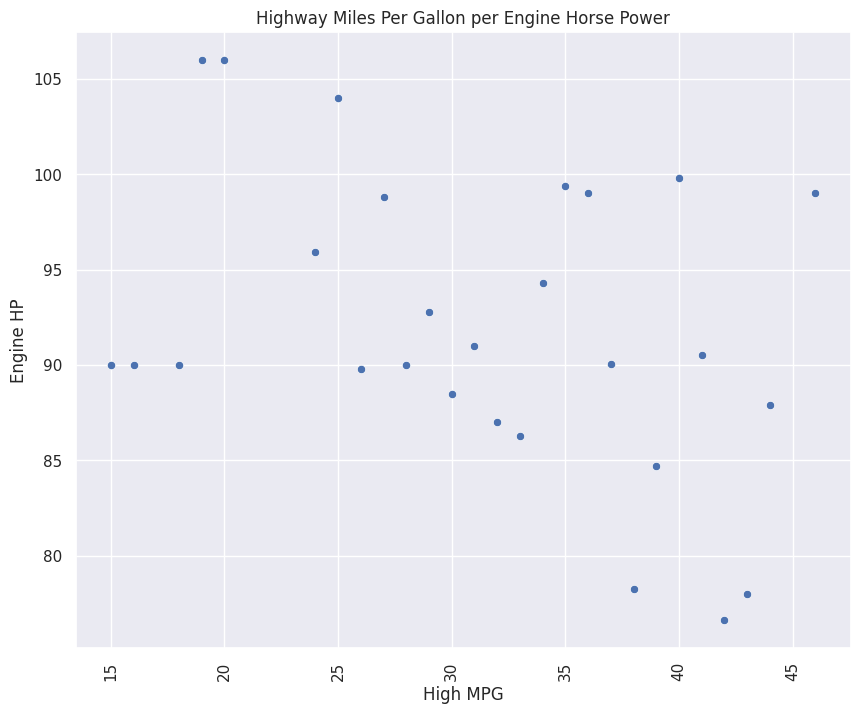

In [24]:
# Make a scatter plot of Engine HP vs highway MPG
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cleaned_highway_mpg_per_engine_hp, x='highway_mpg', y='engine_hp')
plt.xticks(rotation=90)
plt.xlabel('High MPG')
plt.ylabel('Engine HP')
plt.title('Highway Miles Per Gallon per Engine Horse Power')
plt.show()

In [25]:
cleaned_highway_mpg_per_engine_hp.to_csv('../data/cleaned_highway_mpg_per_engine_hp.csv', index=False)

# What does this plot tell you about how Engine HP affects highway MPG?

In [26]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('This plot shows that as Engine HP increases,\n' \
'highway MPG tends to decrease, indicating an inverse relationship between engine power,\n' \
'and fuel efficiency on highways. Higher horsepower engines typically consume more fuel,\n' \
'leading to lower miles per gallon.')


This plot shows that as Engine HP increases,
highway MPG tends to decrease, indicating an inverse relationship between engine power,
and fuel efficiency on highways. Higher horsepower engines typically consume more fuel,
leading to lower miles per gallon.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

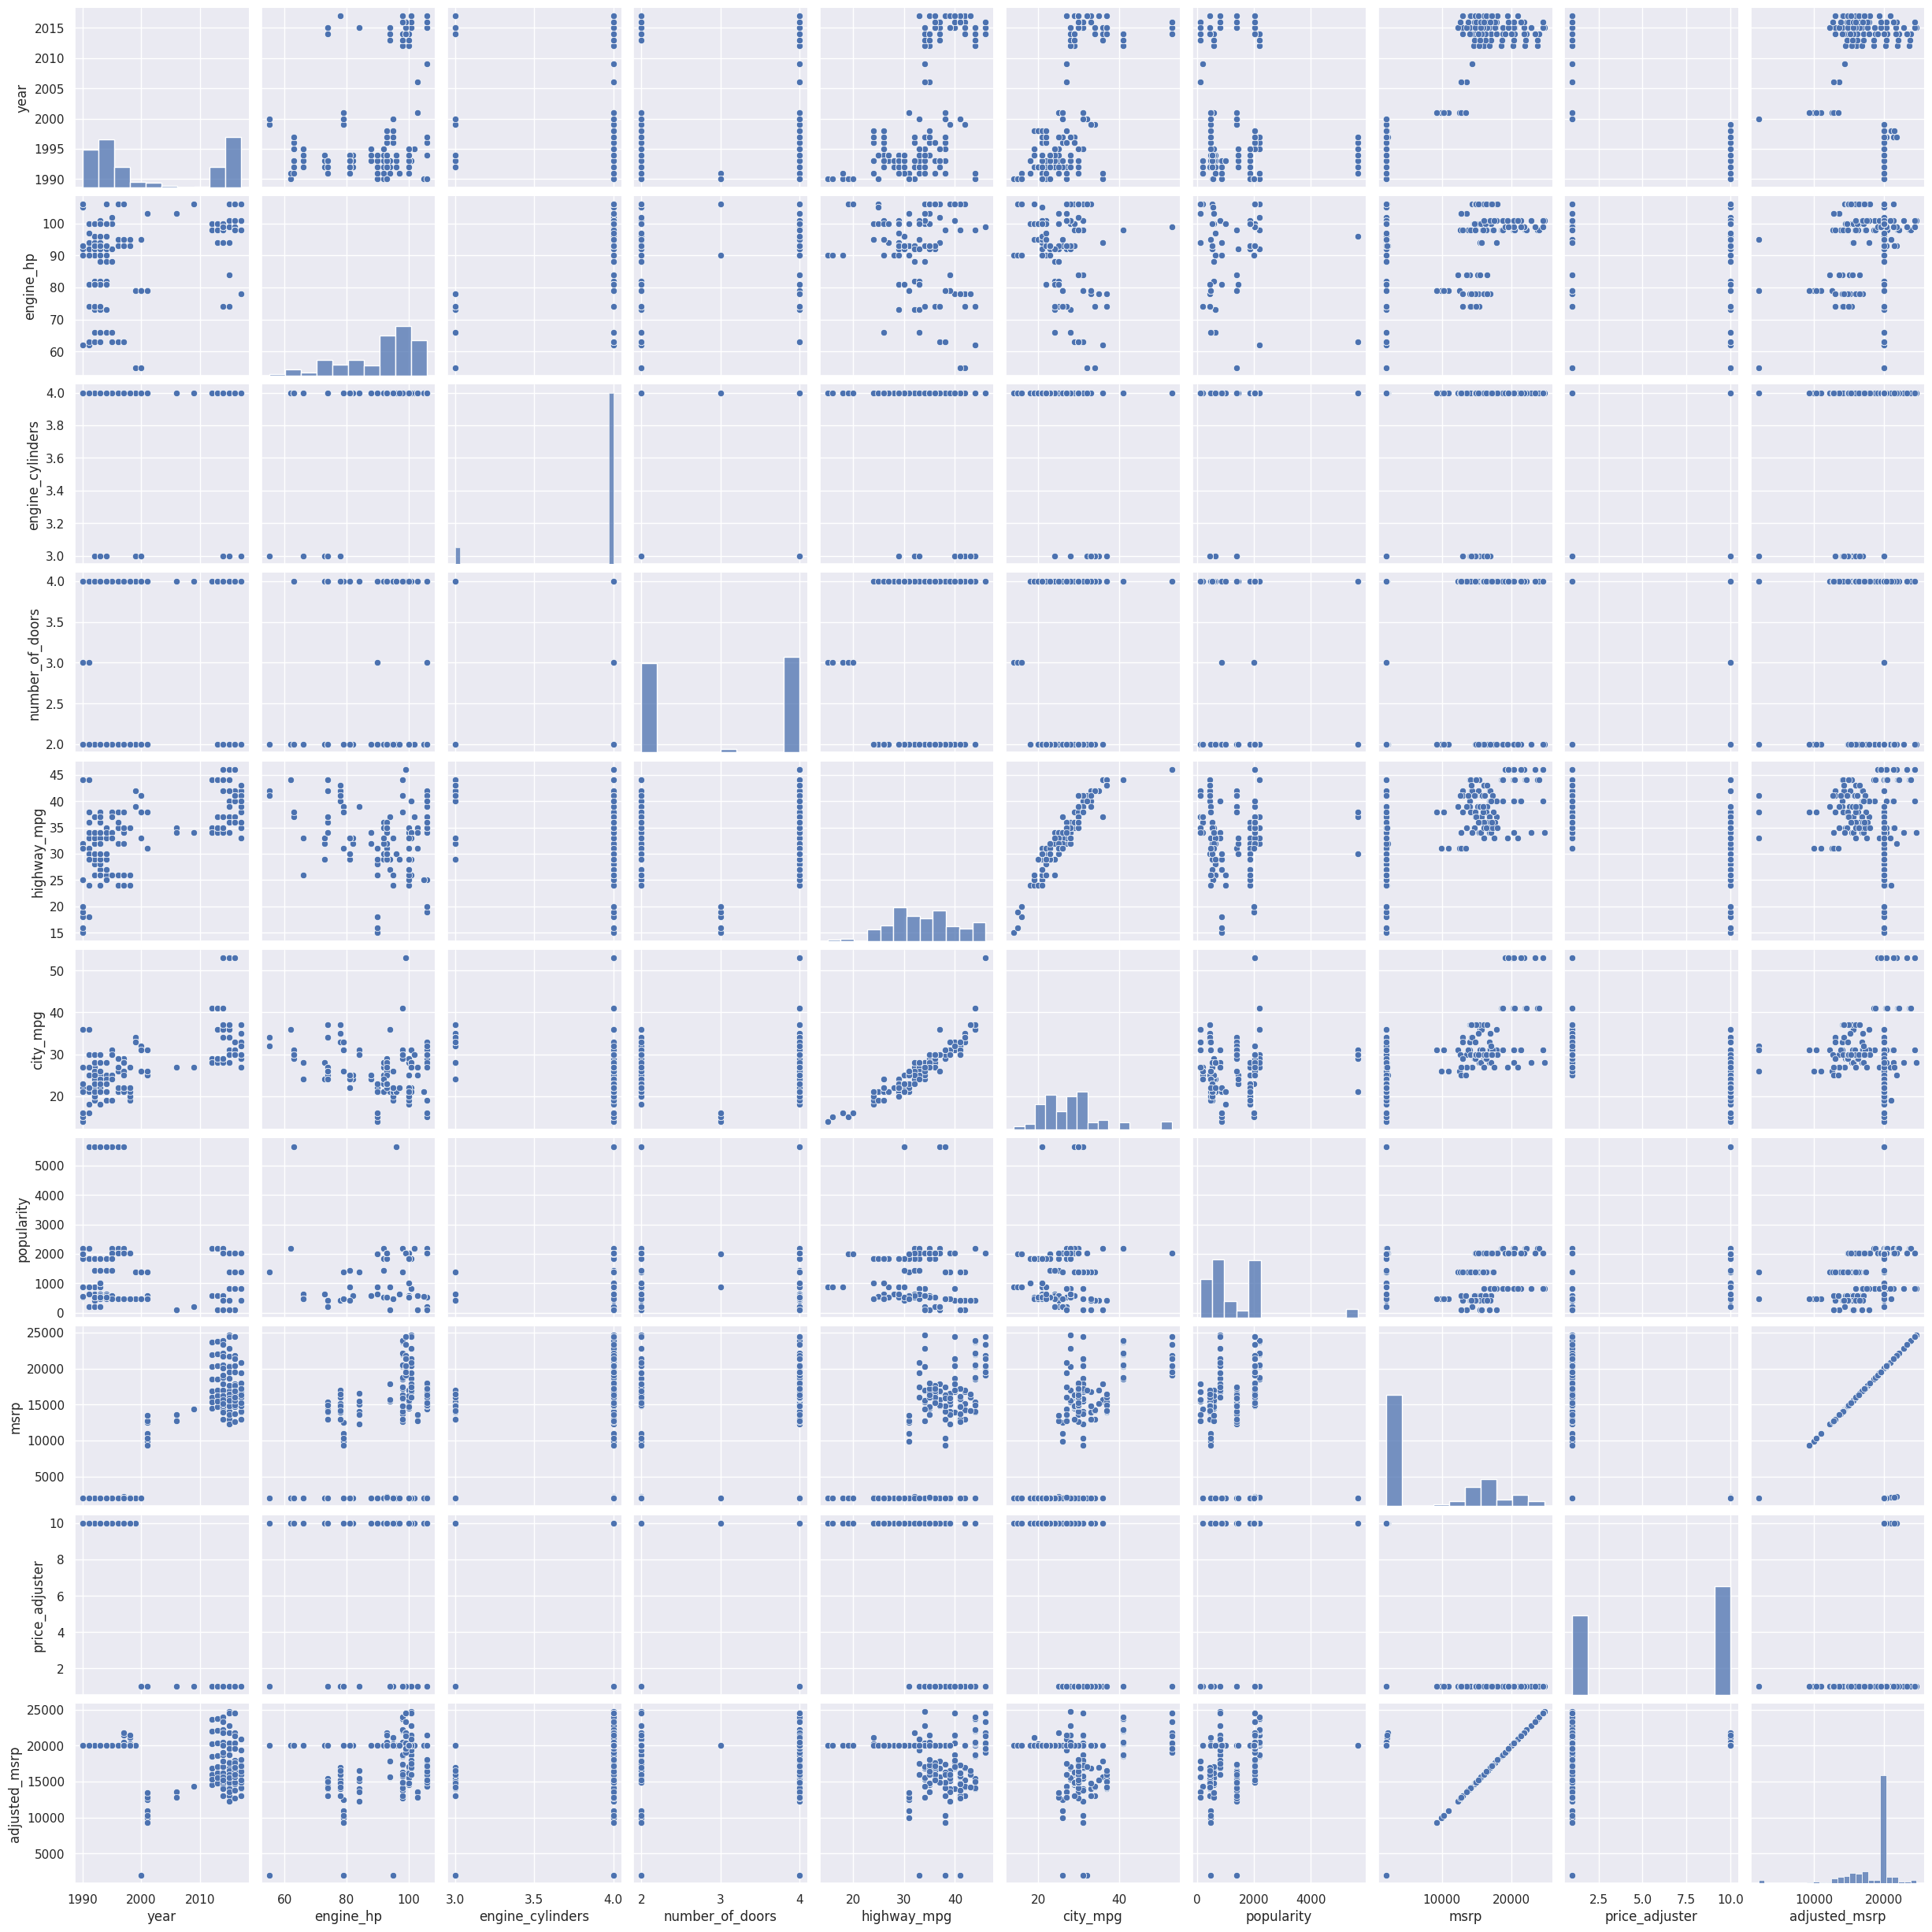

In [27]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df_cleaned)


### * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

- highway_mpg and city_mpg share a strong positive linear relationship. As highway_mpg increases, city_mpg also tends to increase.
- city_mpg and engine_hp have a strong linear negative relationship showing that as engine_hp increases, city_mpg also tends to decrease

In [28]:
df_cleaned.to_csv('../data/cleaned_cars_data.csv', index=False)

# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

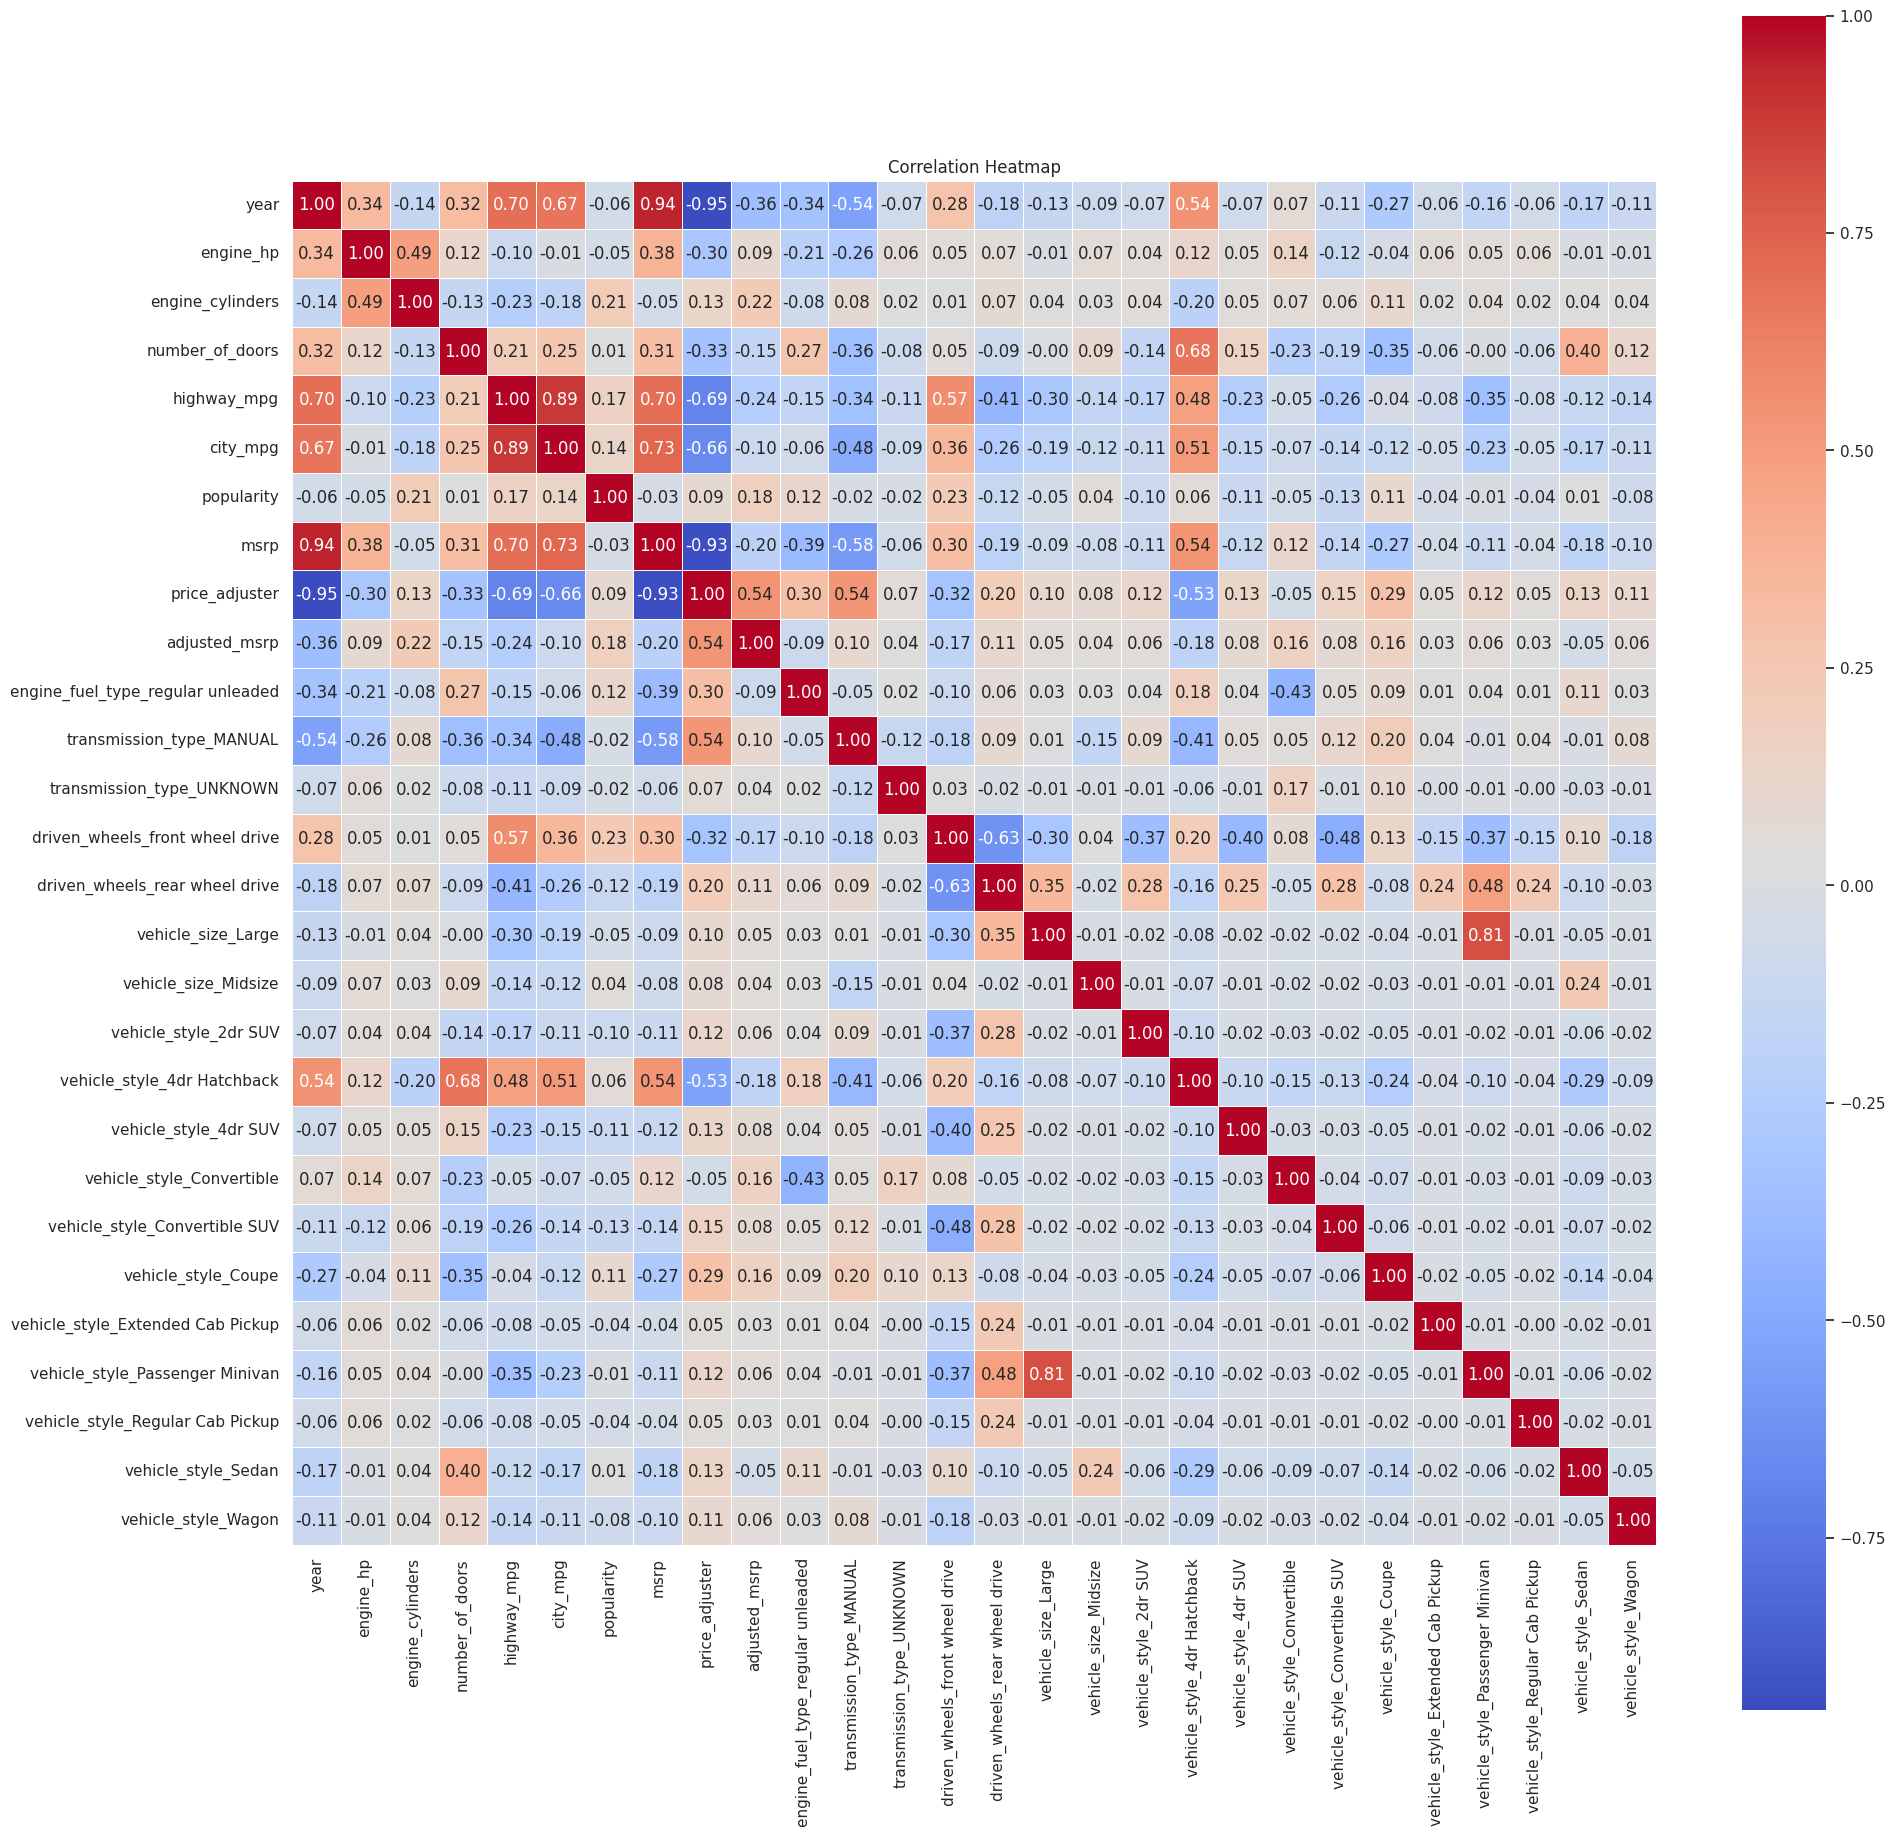

In [29]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

# Tested placing the original dataframe in .corr() and wound up with errors due to non-numeric data types.
# So, I converted categorical columns to numeric using one-hot encoding before calculating correlations.
 
categorical_cols = ['engine_fuel_type', 'transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style']

encoded_df = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True, dtype=int, prefix_sep='_', sparse=False, dummy_na=False)

heatmap_correlations = encoded_df.corr(numeric_only=True)
plt.figure(figsize=(22,22))
sns.heatmap(heatmap_correlations, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap')
plt.show()



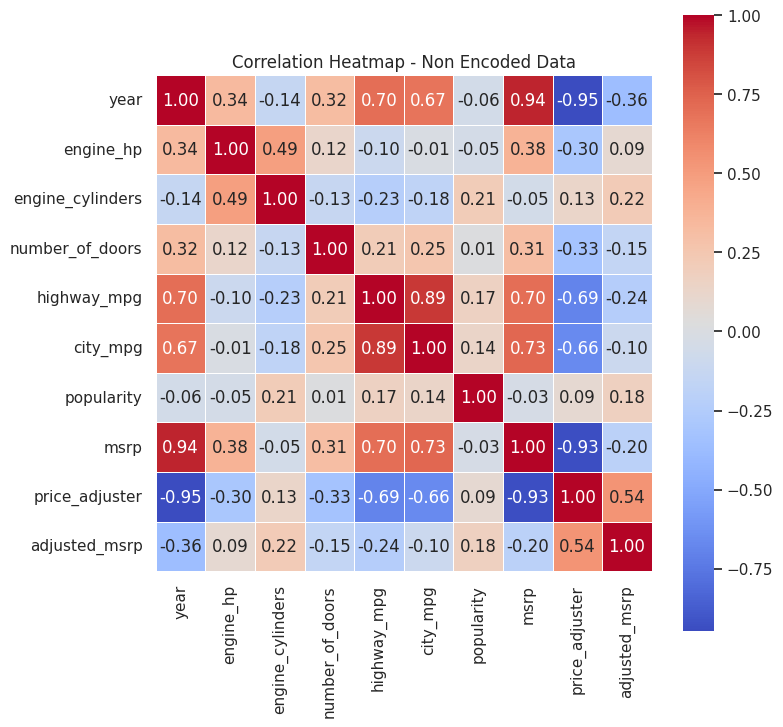

In [30]:
non_encoded_df = df_cleaned.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 8))
sns.heatmap(non_encoded_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap - Non Encoded Data')
plt.show()

In [31]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('engine_hp has the strongest relationship with engine_cylinders.\n' \
'This relationship exists because the number of cylinders in an engine directly influences its horsepower.\n' \
'More cylinders typically allow for more fuel combustion, which can generate greater power output,\n' \
'leading to higher engine horsepower. Therefore, as the number of engine cylinders increases,\n' \
'the engine horsepower tends to increase as well.')

engine_hp has the strongest relationship with engine_cylinders.
This relationship exists because the number of cylinders in an engine directly influences its horsepower.
More cylinders typically allow for more fuel combustion, which can generate greater power output,
leading to higher engine horsepower. Therefore, as the number of engine cylinders increases,
the engine horsepower tends to increase as well.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




In [32]:
# Original dataframe
original_df = pd.read_csv('../data/cars.csv')

# Do a check of the dataframe:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [33]:
print(f' Total Number of duplicated rows: {original_df.duplicated().sum()}')

 Total Number of duplicated rows: 720


In [ ]:
# Remove duplicate rows
original_df.drop_duplicates(inplace=True)

In [34]:
print(f'Number of NA values:\n{original_df.isna().sum()}')

Number of NA values:
Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


In [36]:
# Remove rows with NA values
original_df.dropna(inplace=True)

In [37]:
# Check the dataframe again
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11812 non-null  object 
 1   Model              11812 non-null  object 
 2   Year               11812 non-null  int64  
 3   Engine Fuel Type   11812 non-null  object 
 4   Engine HP          11812 non-null  float64
 5   Engine Cylinders   11812 non-null  float64
 6   Transmission Type  11812 non-null  object 
 7   Driven_Wheels      11812 non-null  object 
 8   Number of Doors    11812 non-null  float64
 9   Vehicle Size       11812 non-null  object 
 10  Vehicle Style      11812 non-null  object 
 11  highway MPG        11812 non-null  int64  
 12  city mpg           11812 non-null  int64  
 13  Popularity         11812 non-null  int64  
 14  MSRP               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
z_scores = np.abs(stats.zscore(original_df.select_dtypes(include=[np.number])))
threshold = 3